In [20]:
import sys
!{sys.executable} -m pip install opencv-python

ERROR: Could not find a version that satisfies the requirement cv2-python (from versions: none)
ERROR: No matching distribution found for cv2-python
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.2.3/libexec/bin/python3.9 -m pip install --upgrade pip' command.


In [ ]:
import sys
!{sys.executable} -m pip install camelot-py

In [23]:
import sys
!{sys.executable} -m pip install seaborn

     |████████████████████████████████| 292 kB 4.9 MB/s eta 0:00:01
     |████████████████████████████████| 33.2 MB 4.0 MB/s eta 0:00:012    |████████▏                       | 8.4 MB 16.2 MB/s eta 0:00:02
     |████████████████████████████████| 7.3 MB 15.0 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 456 kB/s  eta 0:00:01
     |████████████████████████████████| 3.0 MB 9.2 MB/s eta 0:00:01
     |████████████████████████████████| 880 kB 11.9 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.2.3/libexec/bin/python3.9 -m pip install --upgrade pip' command.


In [30]:
import camelot as cm
import numpy as np
import pandas as pd
import seaborn

### Other Python modules:

- Tabula
- Pdfplumber
- Pdftable
- Pdf-table-extract

### Why Camelot?

Unline other libraries which either provide a nice ouput of fail.
It enables to tweak table extraction, more adapted to real world PDF table extraction)

Advantages:

- ##### Maintain the control over hyperparameters to tweak how you want to extract the data 
- #### Bad tables can be discarded based on Metrics (i.e: accuracy, whitespace)
- #### Each Table is a Pandas DataFrame, which seamlessly integrated into ETL and Data Analysis Workflows
- #### Export data extracted to multiple formats, JSON, Excel and HTML

In [32]:
! ls

data_extraction_notebook.ipynb


### Input the PDF:

There are two ways of reading PDFs:
- Direcly from the web
- From downloaded PDFs on our local machine

In [ ]:
# From website:
# input_pdf = cm.read_pdf("URL")

In [33]:
### From local machine
pdf_fyle = cm.read_pdf('/Users/userpersona/Desktop/india_factsheet_economic_n_hdi.pdf')
pdf_fyle

ModuleNotFoundError: No module named 'ghostscript'

In [34]:
import sys
!{sys.executable} -m pip install ghostscript

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.2.3/libexec/bin/python3.9 -m pip install --upgrade pip' command.


There are two ways Camelot can parser PDF files:
- stream
- lattice

In [42]:
### From local machine
input_pdf = cm.read_pdf('/Users/userpersona/Desktop/india_factsheet_economic_n_hdi.pdf', flavor='lattice', pages='1,2')

In [43]:
# there are four tables on our file
input_pdf

<TableList n=4>

In [44]:
for n in input_pdf:
    print(n)

<Table shape=(4, 3)>
<Table shape=(15, 3)>
<Table shape=(14, 4)>
<Table shape=(13, 3)>


Our file contains the following dimensions:
- 4 PDF tables
- each table has (rows, columns) format

In [45]:
input_pdf[2].df

,0,1,2,3
0,Human Development Indicators,,2000,2011
1,13,Human Development Index Value (HDI),0.461,0.547
2,14,HDI Rank (out of 187),,134
3,15,Inequality Adjusted Human Development Index Value,,0.392
4,16,Loss in HDI due to Inequalities (%),,28.7
5,,,2001,2011
6,17,Gender Inequality Index (GII),0.5531,0.617
7,18,GII Rank (out of 146),,129
8,,,1996,2006
9,19,Gender Empowerment Measure (GEM),0.416,0.497


In [46]:
df = input_pdf[2].df.loc[11:14,1:3]

In [47]:
df

,1,2,3
11,Literacy Rate (%),64.8,74.04
12,Male Literacy Rate (%),75.3,82.14
13,Female Literacy Rate (%),53.7,65.46


In [48]:
df = df.reset_index(drop=True)

In [49]:
df.columns = ['KPI','2001','2011']

In [50]:
df

,KPI,2001,2011
0,Literacy Rate (%),64.8,74.04
1,Male Literacy Rate (%),75.3,82.14
2,Female Literacy Rate (%),53.7,65.46


In [51]:
df.loc[:,['2001', '2011']] = df.loc[:,['2001','2011']].astype(float)

In [52]:
df

,KPI,2001,2011
0,Literacy Rate (%),64.8,74.04
1,Male Literacy Rate (%),75.3,82.14
2,Female Literacy Rate (%),53.7,65.46


In [53]:
df.to_csv('table_from_pdf.csv')

In [54]:
! ls

data_extraction_notebook.ipynb table_from_pdf.csv


In [55]:
df.to_excel('table_from_pdf.xlsx')

In [56]:
! ls

data_extraction_notebook.ipynb table_from_pdf.xlsx
table_from_pdf.csv


In [57]:
import seaborn as sns

In [58]:
df2 = pd.read_csv('/Users/userpersona/Desktop/pdf_data_extraction/table_from_pdf.csv')
df2

,Unnamed: 0,KPI,2001,2011
0,0,Literacy Rate (%),64.8,74.04
1,1,Male Literacy Rate (%),75.3,82.14
2,2,Female Literacy Rate (%),53.7,65.46


In [59]:
df_melted = df.melt('KPI', var_name='year', value_name='percentage')

<AxesSubplot:xlabel='KPI', ylabel='percentage'>

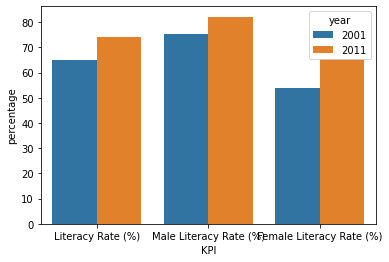

In [60]:
sns.barplot(x= 'KPI', y='percentage', hue = 'year', data = df_melted)